**RQ2: DESCRIPTIVE AND INFERENTIAL STATISTICAL TESTS**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load LOC metric data

In [2]:
app_loc_data = pd.read_csv('./groups/loc/app_loc.csv', index_col=0)
database_loc_data = pd.read_csv('./groups/loc/database_loc.csv', index_col=0)
nlp_loc_data = pd.read_csv('./groups/loc/nlp_loc.csv', index_col=0)
ide_loc_data = pd.read_csv('./groups/loc/ide_loc.csv', index_col=0)
desk_loc_data = pd.read_csv('./groups/loc/desk_loc.csv', index_col=0)
web_loc_data = pd.read_csv('./groups/loc/web_loc.csv', index_col=0)
lib_loc_data = pd.read_csv('./groups/loc/lib_loc.csv', index_col=0)
cicd_loc_data = pd.read_csv('./groups/loc/cicd_loc.csv', index_col=0)

Load DIT metric data

In [3]:
app_dit_data = pd.read_csv('./groups/dit/app_dit.csv', index_col=0)
database_dit_data = pd.read_csv('./groups/dit/database_dit.csv', index_col=0)
nlp_dit_data = pd.read_csv('./groups/dit/nlp_dit.csv', index_col=0)
ide_dit_data = pd.read_csv('./groups/dit/ide_dit.csv', index_col=0)
desk_dit_data = pd.read_csv('./groups/dit/desk_dit.csv', index_col=0)
web_dit_data = pd.read_csv('./groups/dit/web_dit.csv', index_col=0)
lib_dit_data = pd.read_csv('./groups/dit/lib_dit.csv', index_col=0)
cicd_dit_data = pd.read_csv('./groups/dit/cicd_dit.csv', index_col=0)

Load LCC metric data

In [4]:
app_lcc_data = pd.read_csv('./groups/lcc/app_lcc.csv', index_col=0)
database_lcc_data = pd.read_csv('./groups/lcc/database_lcc.csv', index_col=0)
nlp_lcc_data = pd.read_csv('./groups/lcc/nlp_lcc.csv', index_col=0)
ide_lcc_data = pd.read_csv('./groups/lcc/ide_lcc.csv', index_col=0)
desk_lcc_data = pd.read_csv('./groups/lcc/desk_lcc.csv', index_col=0)
web_lcc_data = pd.read_csv('./groups/lcc/web_lcc.csv', index_col=0)
lib_lcc_data = pd.read_csv('./groups/lcc/lib_lcc.csv', index_col=0)
cicd_lcc_data = pd.read_csv('./groups/lcc/cicd_lcc.csv', index_col=0)

*Interquartile Range*

In [5]:
# Function to build a df with IQR values
from scipy import stats
import pandas as pd

def calculate_iqr(data, variable):
    iqr_data = {
        'Project': [],
        'Variable': [],
        'IQR': [],
    }

    for project in data.index.values:
        iqr = stats.iqr(data.loc[project].dropna())
        iqr_data['Project'].append(project)
        iqr_data['Variable'] = variable
        iqr_data['IQR'].append(iqr)

    iqr_df = pd.DataFrame(iqr_data)
    return iqr_df

In [6]:
# you can calculate the iqr for each group by changing the data variable
data = app_loc_data

iqr_df = calculate_iqr(data, 'LOC')
iqr_df

,Project,Variable,IQR
0,k-9 mail,LOC,16416.0
1,jitsi,LOC,14065.0


*Pearson Correlation Coefficient*

Find the pairwise correlation of all columns in every category dataframe. If there is no reason to assume that the relation is linear, then one can (a) transform one or both variables using logarithm and then checking whether the relation would 
be meaningfully linear, and (b) use a different correlation coefficient, Spearman’s \rho or Kendall’s \tau.

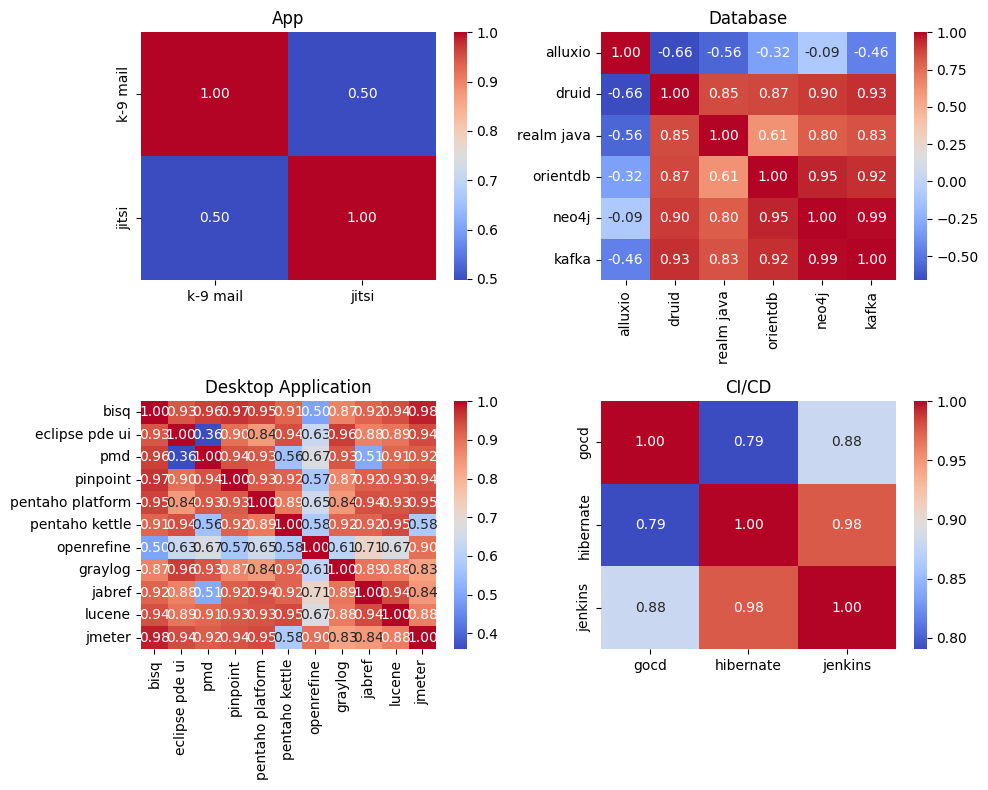

In [7]:
app_corr = app_loc_data.T.corr()
cicd_corr = cicd_loc_data.T.corr()
database_corr = database_loc_data.T.corr()
desk_corr = desk_loc_data.T.corr()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.heatmap(app_corr, ax=axes[0, 0], cmap='coolwarm', annot=True, fmt=".2f")
axes[0, 0].set_title('App')
sns.heatmap(database_corr, ax=axes[0, 1], cmap='coolwarm', annot=True, fmt=".2f")
axes[0, 1].set_title('Database')
sns.heatmap(desk_corr, ax=axes[1, 0], cmap='coolwarm', annot=True, fmt=".2f")
axes[1, 0].set_title('Desktop Application')
sns.heatmap(cicd_corr, ax=axes[1, 1], cmap='coolwarm', annot=True, fmt=".2f")
axes[1, 1].set_title('CI/CD')
plt.tight_layout()
plt.show()

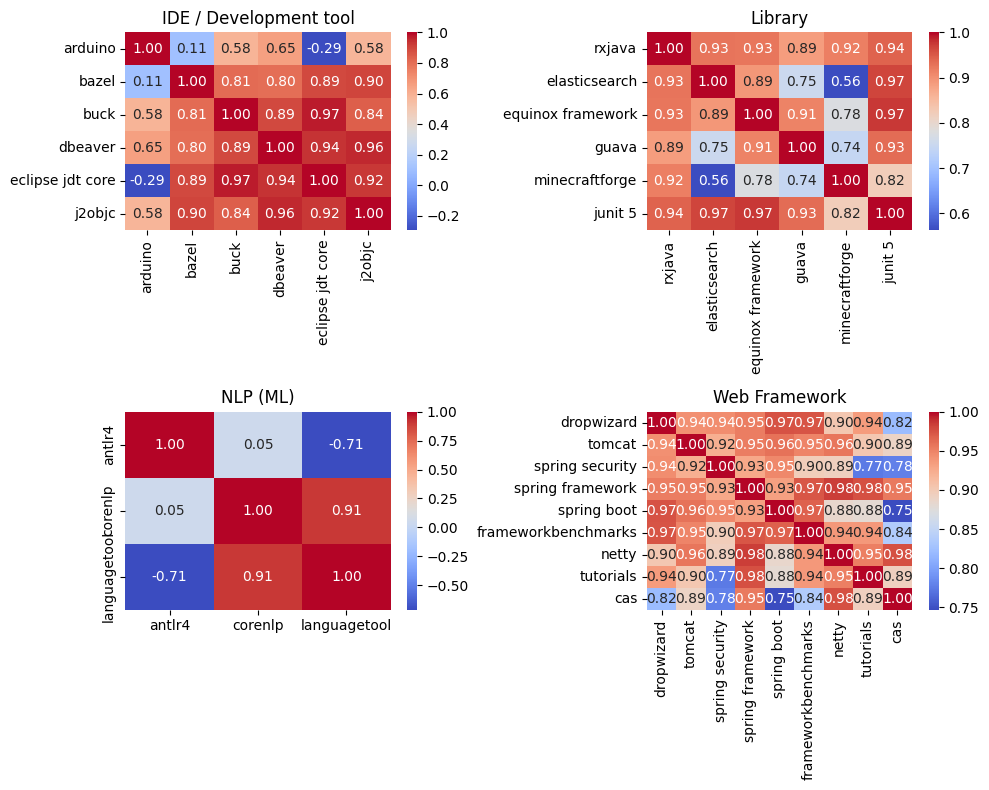

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ide_corr = ide_loc_data.T.corr()
lib_corr = lib_loc_data.T.corr()
nlp_corr = nlp_loc_data.T.corr()
web_corr = web_loc_data.T.corr()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.heatmap(ide_corr, ax=axes[0, 0], cmap='coolwarm', annot=True, fmt=".2f")
axes[0, 0].set_title('IDE / Development tool')
sns.heatmap(lib_corr, ax=axes[0, 1], cmap='coolwarm', annot=True, fmt=".2f")
axes[0, 1].set_title('Library')
sns.heatmap(nlp_corr, ax=axes[1, 0], cmap='coolwarm', annot=True, fmt=".2f")
axes[1, 0].set_title('NLP (ML)')
sns.heatmap(web_corr, ax=axes[1, 1], cmap='coolwarm', annot=True, fmt=".2f")
axes[1, 1].set_title('Web Framework')
plt.tight_layout()
plt.show()

*Q-Q plots, see if there are deviations from normality*

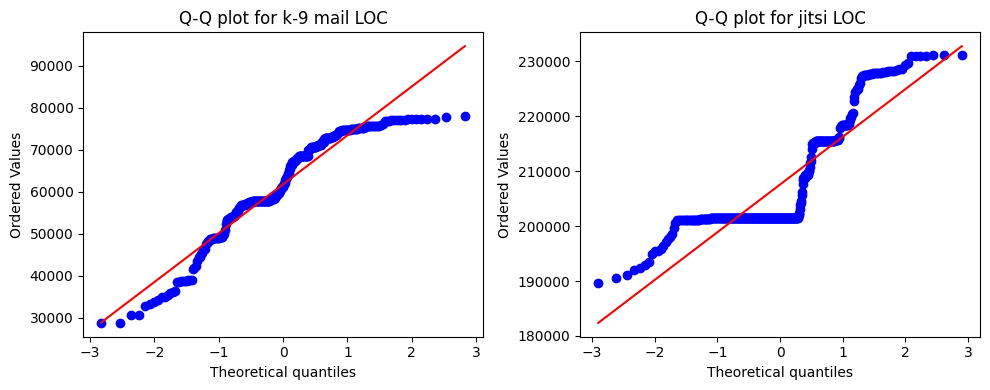

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

stats.probplot(app_loc_data.T['k-9 mail'].dropna(), dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot for k-9 mail LOC')
stats.probplot(app_loc_data.T['jitsi'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot for jitsi LOC')
plt.tight_layout()
plt.show()

There appear many violations, check statistically with Shapiro-Wilk test for normality

In [10]:
print(stats.shapiro(app_loc_data.T['k-9 mail'].dropna()))
print(stats.shapiro(app_loc_data.T['jitsi'].dropna()))

ShapiroResult(statistic=0.9269086718559265, pvalue=8.39294189702855e-11)
ShapiroResult(statistic=0.7780553102493286, pvalue=4.330686830433883e-22)


Since the p-values are close to zero we reject the null hypothesis, so the data does not come from normal distributions

Both of the variables have a significant p-value which means each variable violates the assumption of normality. Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use to analyze this data.

In [11]:
#stats.wilcoxon(insert_the_variables)